In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OrdinalEncoder
from sqlalchemy import create_engine
from final_files.config import  config_ai

In [2]:
db_connection_str = f"mysql+pymysql://{config_ai['user']}:{config_ai['password']}@{config_ai['host']}:{config_ai['port']}/{config_ai['database']}"
engine = create_engine(db_connection_str)
df_clean = pd.read_sql(f'SELECT * FROM daytriptour_ai.clean_data', con=engine)

In [3]:
df_country = pd.read_csv('./raw_csv/dtt_country.csv')[['country_id','country_code','country_phonecode','country_name']]
id_to_countryCode = {i[1][0] : i[1][3] for i in df_country.iterrows()}
countryCode_to_id = {i[1][1] : i[1][0] for i in df_country.iterrows()}
phoneCode_to_id = {}
countryName_to_id = {i[1][3] : i[1][0] for i in df_country.iterrows()}
for i in df_country.iterrows():
    val = i[1][0]
    if len(i[1][2].split(',')) > 1:
        for j in i[1][2].split(','):
            phoneCode_to_id[j] = val
    else:
        phoneCode_to_id[i[1][2]] = val

## ความสัมพันธ์ของวันที่จอง

Percentile 90 : 4 days


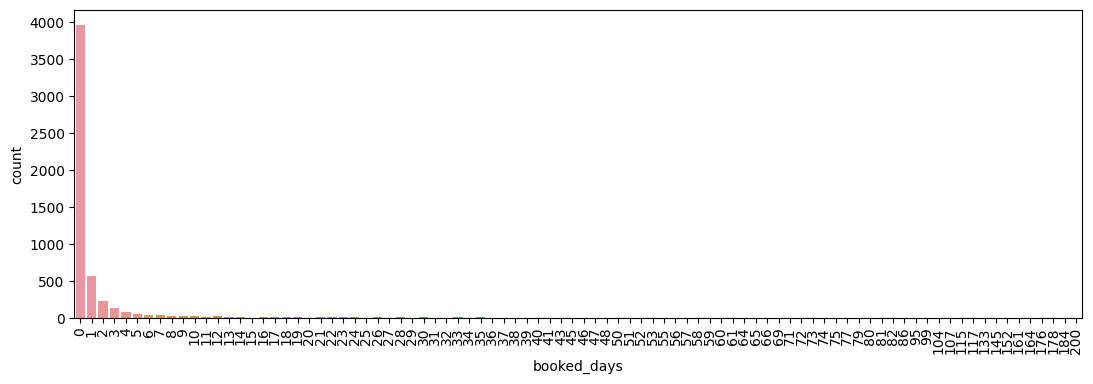

In [5]:
# 80% booking before a day and 90% booking before 4 days
print('Percentile 90 :',int(df_clean['booked_days'].quantile(.9)), 'days')
plt.figure(figsize=(13, 4))
sns.countplot(data=df_clean, x = 'booked_days')
plt.xticks(rotation=90)
plt.show()

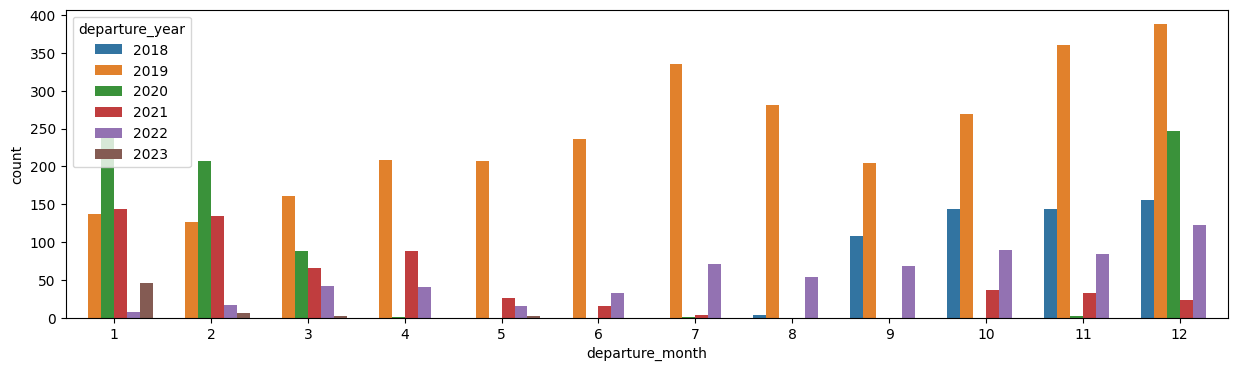

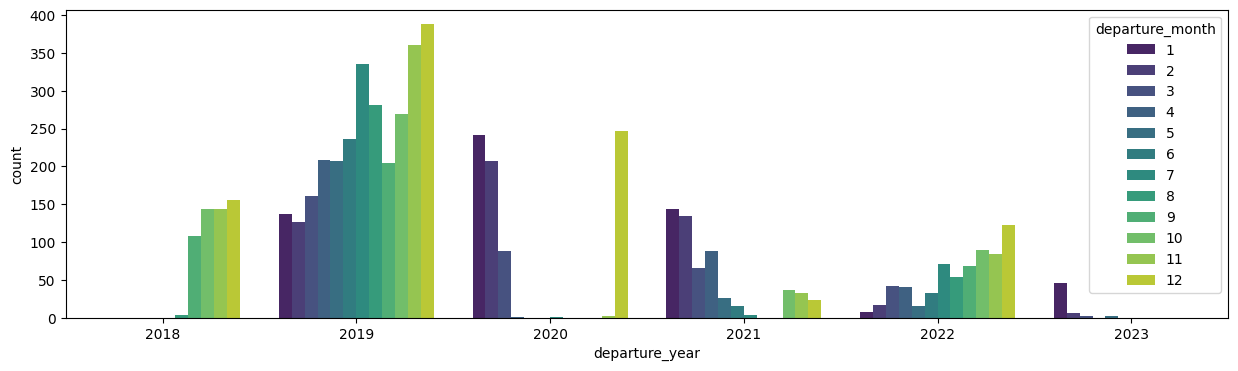

In [6]:
# high season start on September
plt.figure(figsize=(15, 4))
sns.countplot(data=df_clean, x = 'departure_month', hue='departure_year')
plt.show()
plt.figure(figsize=(15, 4))
sns.countplot(data=df_clean, x = 'departure_year', hue='departure_month', palette="viridis")
plt.show()

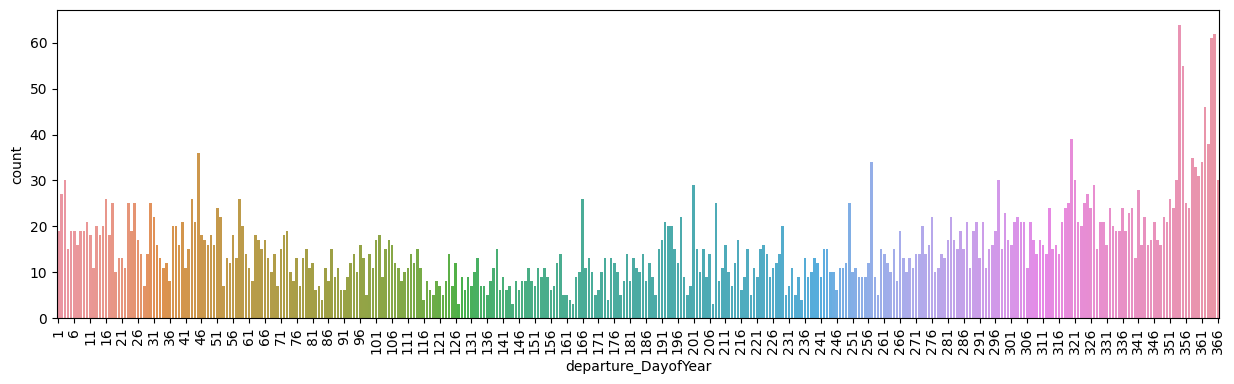

In [7]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_clean, x = 'departure_DayofYear')
plt.xticks(rotation=90)
plt.xticks(range(0, 366,5))
plt.show()

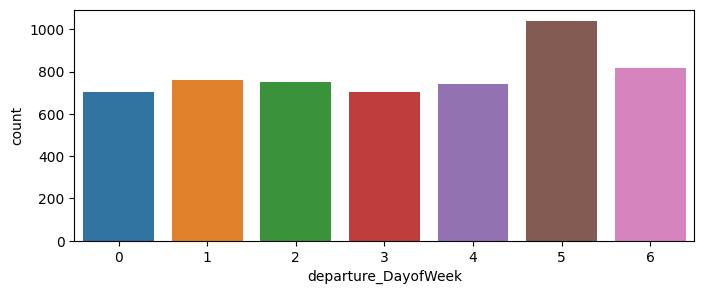

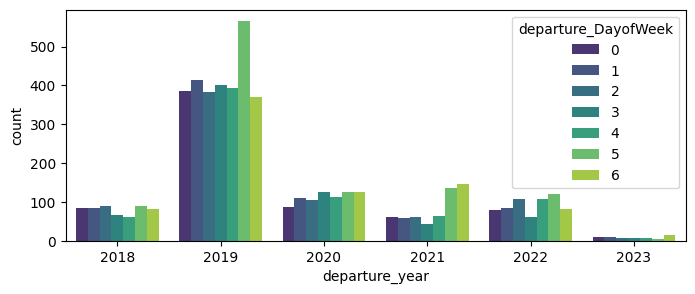

In [8]:
# departure date on Saturday and Sunday
plt.figure(figsize=(8, 3))
sns.countplot(data=df_clean, x = 'departure_DayofWeek')
plt.show()
plt.figure(figsize=(8, 3))
sns.countplot(data=df_clean, x = 'departure_year', hue='departure_DayofWeek', palette="viridis")
plt.show()

## ความสัมพันธ์ระหว่างประเทศ

218 : Thailand
105 : India
 77 : United Kingdom
 233 : United States
 13 : Australia


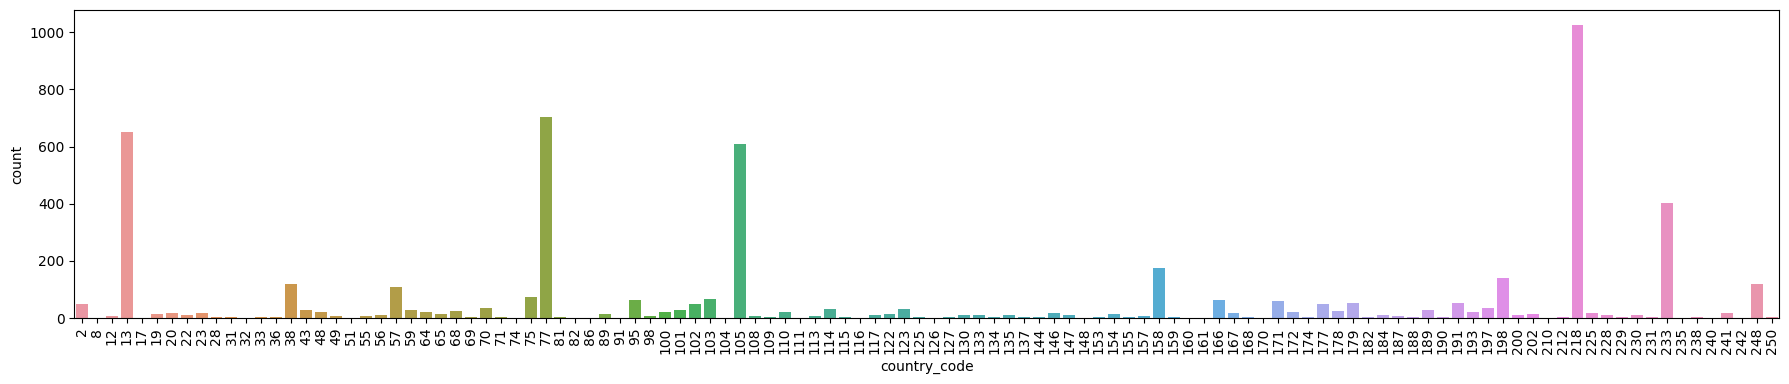

0:Mr. , 1:Ms. , 3:Mrs.


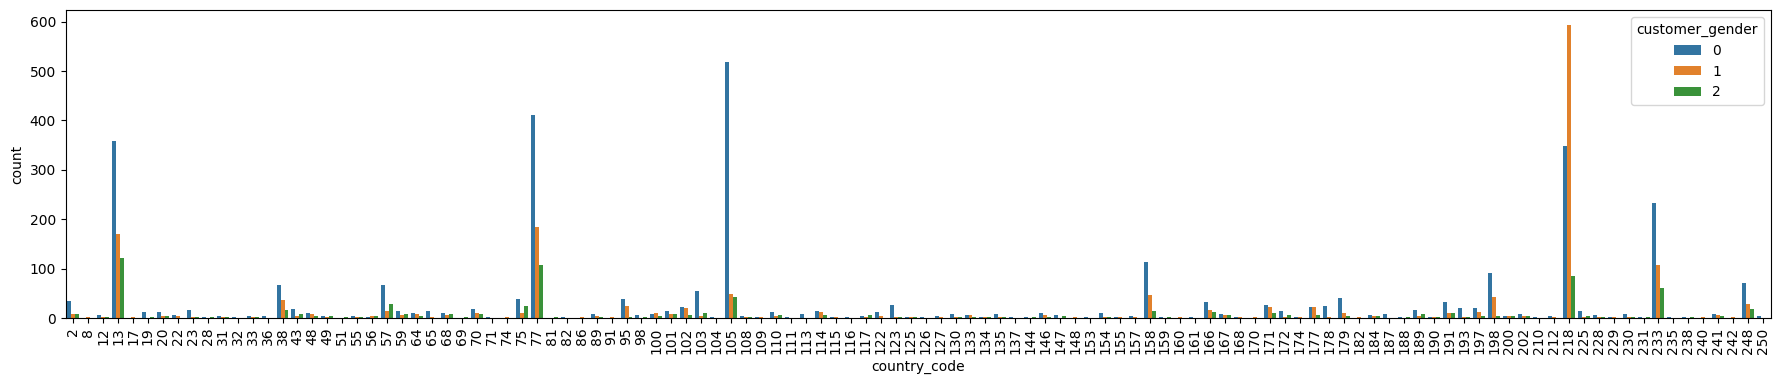

In [11]:
print(f'218 : {id_to_countryCode[218]}\n105 : {id_to_countryCode[105]}\n 77 : {id_to_countryCode[77]}\n 233 : {id_to_countryCode[233]}\n 13 : {id_to_countryCode[13]}')
plt.figure(figsize=(22, 4))
sns.countplot(data=df_clean, x = 'country_code')
plt.xticks(rotation=90)
plt.show()
print('0:Mr. , 1:Ms. , 3:Mrs.')
plt.figure(figsize=(22, 4))
sns.countplot(data=df_clean, x = 'country_code', hue='customer_gender')
plt.xticks(rotation=90)
plt.show()

0:Android Browse 1:AppleWebKit 2:Chrome 3:Edge 4:Windows 5:Firefox 6:MSIE 7:Opera Next 8:Safari 9:SamsungBrowser 10:Vivaldi -1:nan


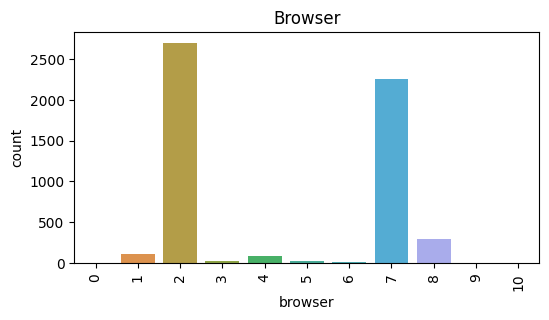

0:Android 1:Chrome OS 2:Linux 3:Macintosh 4:Windows 5:iPad 6:iPhone -1:nan


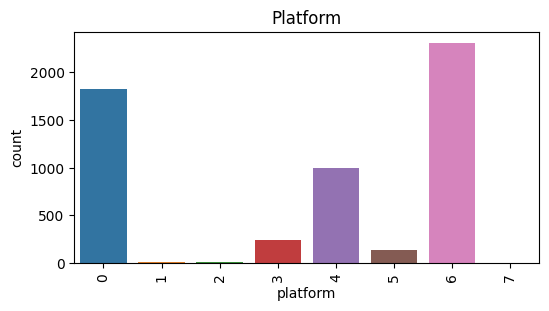

In [10]:
print('0:Android Browse', '1:AppleWebKit', '2:Chrome', '3:Edge', '4:Windows', '5:Firefox','6:MSIE', '7:Opera Next', '8:Safari','9:SamsungBrowser','10:Vivaldi','-1:nan')
plt.figure(figsize=(6, 3))
sns.countplot(data=df_clean, x = 'browser')
plt.xticks(rotation=90)
plt.title('Browser')
plt.show()

print('0:Android', '1:Chrome OS', '2:Linux', '3:Macintosh', '4:Windows', '5:iPad','6:iPhone', '-1:nan')
plt.figure(figsize=(6, 3))
sns.countplot(data=df_clean, x = 'platform')
plt.xticks(rotation=90)
plt.title('Platform')
plt.show()

## ความสัมพันธ์สินค้า

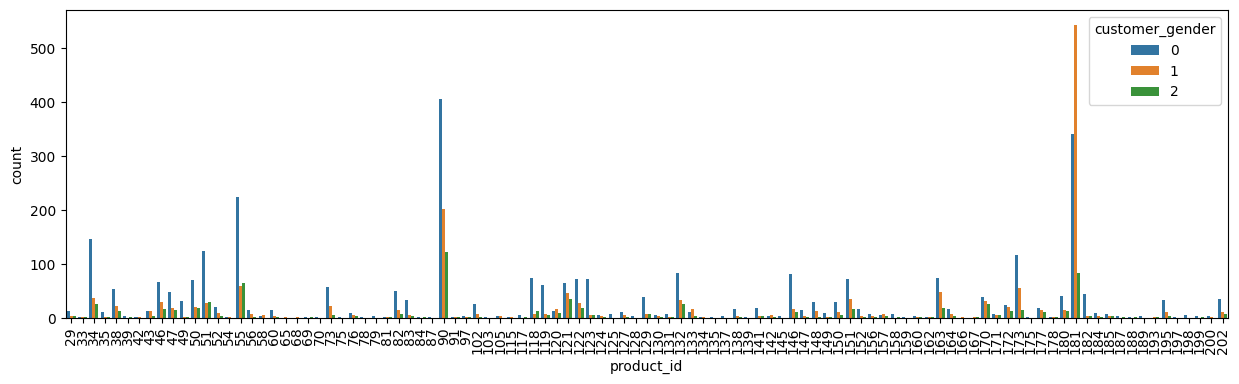

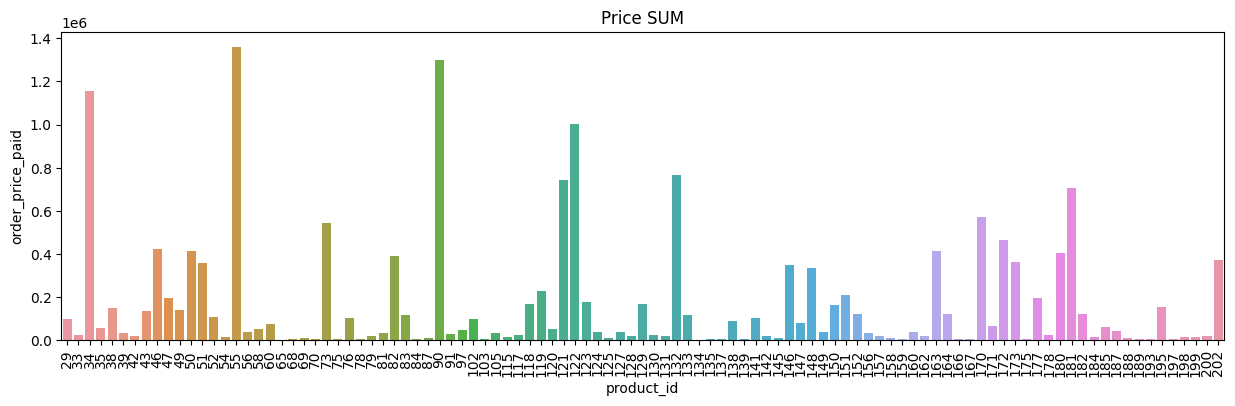

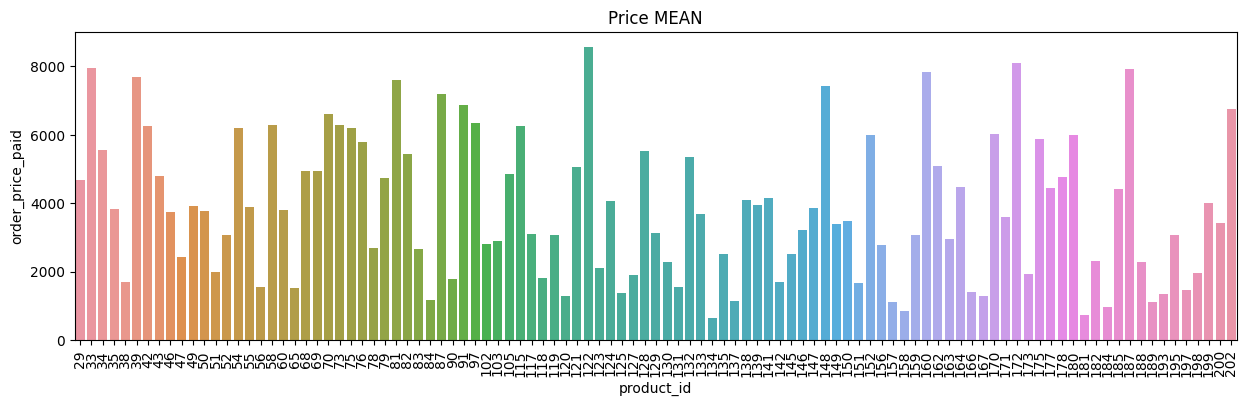

In [31]:
# product_id 181 
plt.figure(figsize=(15, 4))
sns.countplot(data=df_clean, x = 'product_id', hue='customer_gender')
plt.xticks(rotation=90)
plt.show()

df_group = df_clean[['product_id','order_price_paid']].groupby(['product_id']).sum()
plt.figure(figsize=(15, 4))
sns.barplot(data=df_group, x = df_group.index, y = df_group['order_price_paid'])
plt.xticks(rotation=90)
plt.title('Price SUM')
plt.show()

df_group = df_clean[['product_id','order_price_paid']].groupby(['product_id']).mean()
plt.figure(figsize=(15, 4))
sns.barplot(data=df_group, x = df_group.index, y = df_group['order_price_paid'])
plt.xticks(rotation=90)
plt.title('Price MEAN')
plt.show()

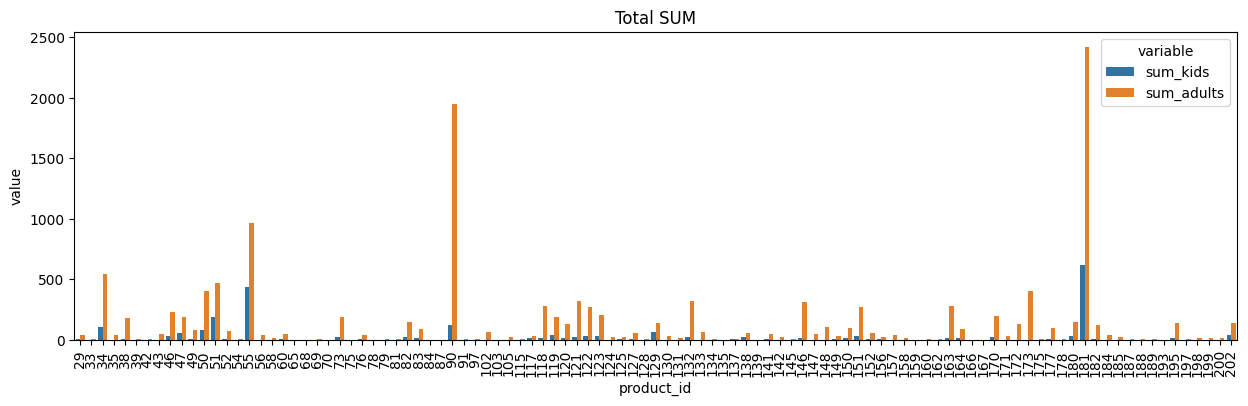

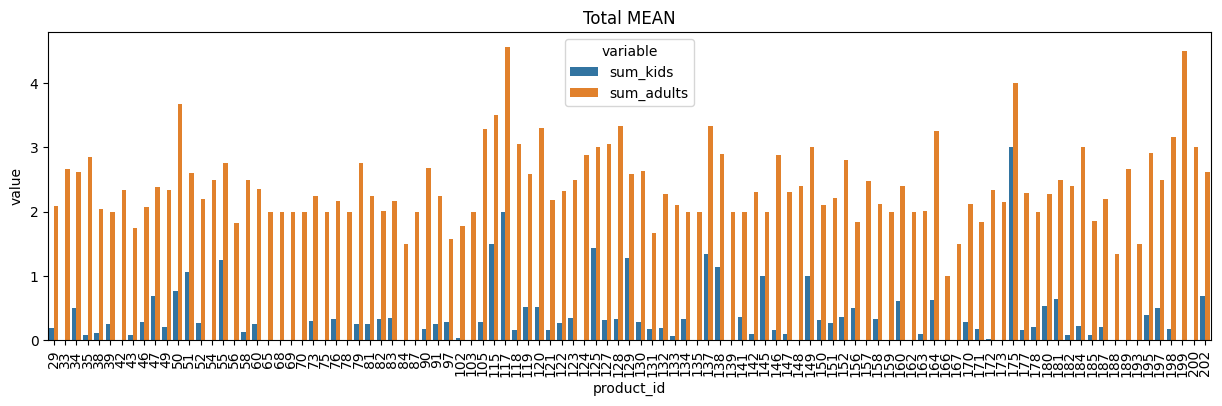

In [32]:
df_group = df_clean[['product_id','sum_kids', 'sum_adults']].groupby(['product_id'], as_index=False).sum()
df_group = df_group.melt(id_vars='product_id')
plt.figure(figsize=(15, 4))
sns.barplot(x='product_id', y='value', hue='variable', data=df_group)
plt.xticks(rotation=90)
plt.title('Total SUM')
plt.show()

df_group = df_clean[['product_id','sum_kids', 'sum_adults']].groupby(['product_id'], as_index=False).mean()
df_group = df_group.melt(id_vars='product_id')
plt.figure(figsize=(15, 4))
sns.barplot(x='product_id', y='value', hue='variable', data=df_group)
plt.xticks(rotation=90)
plt.title('Total MEAN')
plt.show()

# plot 3D

In [4]:
db_connection_str = f"mysql+pymysql://{config_ai['user']}:{config_ai['password']}@{config_ai['host']}:{config_ai['port']}/{config_ai['database']}"
engine = create_engine(db_connection_str)
df_vector_users = pd.read_sql(f'SELECT * FROM daytriptour_ai.vector_user', con=engine)

In [5]:
df_vector_users.iloc[:,1:]

,order_price_paid,sum_kids,sum_adults,private,group,family,cat_1,cat_2,cat_3,cat_4,...,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18
0,0.19796,0.000000,1.000000,0.576117,0.211942,0.211942,0.048396,0.048396,0.048396,0.048396,...,0.079269,0.048396,0.064427,0.048396,0.065824,0.048396,0.048396,0.048396,0.083253,0.048396
1,0.06400,0.000000,1.000000,0.576117,0.211942,0.211942,0.050714,0.050714,0.050714,0.050714,...,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.137856,0.050714
2,0.45000,0.000000,1.000000,0.576117,0.211942,0.211942,0.050714,0.050714,0.050714,0.050714,...,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714
3,0.27200,0.333333,0.666667,0.211942,0.211942,0.576117,0.050714,0.050714,0.050714,0.050714,...,0.050714,0.050714,0.050714,0.050714,0.050714,0.137856,0.050714,0.050714,0.050714,0.050714
4,0.07500,0.000000,1.000000,0.576117,0.211942,0.211942,0.050714,0.050714,0.050714,0.050714,...,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.137856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,0.03600,0.000000,1.000000,0.211942,0.576117,0.211942,0.050714,0.050714,0.050714,0.050714,...,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.137856,0.050714
4988,0.03440,0.200000,0.800000,0.211942,0.211942,0.576117,0.050714,0.050714,0.050714,0.050714,...,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.137856,0.050714
4989,0.03550,0.500000,0.500000,0.211942,0.211942,0.576117,0.050714,0.050714,0.050714,0.050714,...,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.137856,0.050714
4990,0.03600,0.000000,1.000000,0.576117,0.211942,0.211942,0.050714,0.050714,0.050714,0.050714,...,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.050714,0.137856,0.050714


In [6]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=0.95)
sds = StandardScaler()
X_sds = sds.fit_transform(df_vector_users.iloc[:,1:])
X_pca = pca.fit_transform(X_sds)
X_pca.shape

(4992, 14)

In [8]:
pca.explained_variance_ratio_

array([0.22043965, 0.14861481, 0.09389275, 0.07933067, 0.06624436,
       0.06010725, 0.05532599, 0.04409235, 0.04125011, 0.03927176,
       0.03622652, 0.03293119, 0.02814547, 0.01946616])

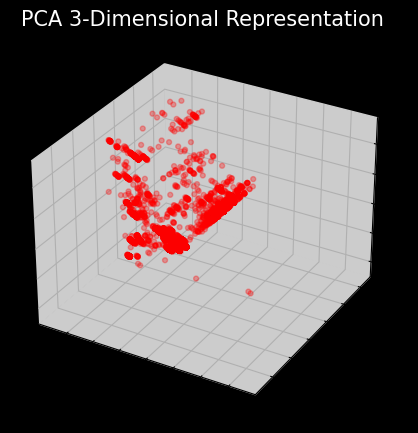

In [36]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c= 'r', s=50, marker='.', alpha=0.3)
ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(True)
ax.axes.set_title('PCA 3-Dimensional Representation', fontsize=15, c='w')
plt.show()

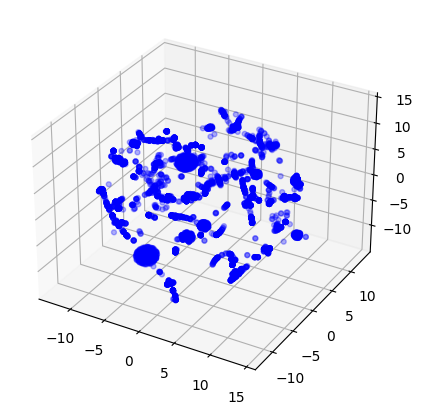

In [19]:
tsne = TSNE(n_components=3, perplexity=100, n_iter=1000)
X_tsne = tsne.fit_transform(X_sds)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c= 'blue', s=50, marker='.', alpha=0.3)
plt.show()

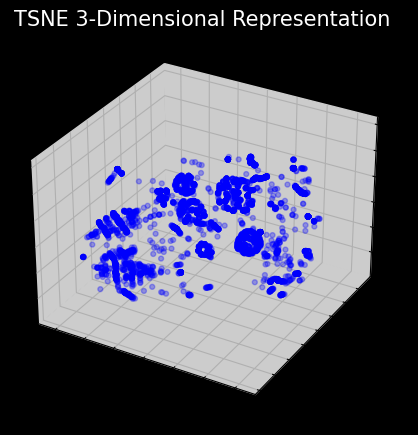

In [33]:
tsne = TSNE(n_components=3, perplexity=1000, n_iter=300)
X_tsne = tsne.fit_transform(X_sds)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c= 'blue', s=50, marker='.', alpha=0.3)
ax.axes.set_title('TSNE 3-Dimensional Representation', fontsize=15, c='w')
ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
fig.set_facecolor('black')
ax.set_facecolor('black')
plt.show()

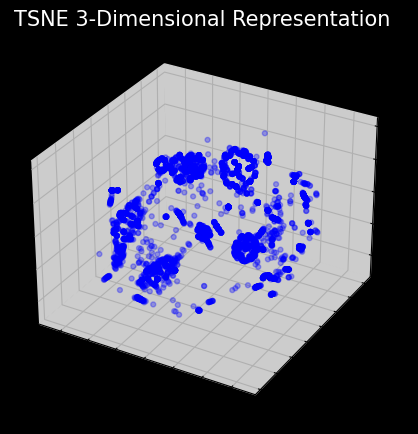

In [34]:
tsne = TSNE(n_components=3, perplexity=1000, n_iter=1000)
X_tsne = tsne.fit_transform(X_sds)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c= 'blue', s=50, marker='.', alpha=0.3)
ax.axes.set_title('TSNE 3-Dimensional Representation', fontsize=15, c='w')
ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
fig.set_facecolor('black')
ax.set_facecolor('black')
plt.show()